In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [5]:
train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
sample = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, StandardScaler
from scipy.sparse import csr_matrix
from sklearn.base import TransformerMixin
import numpy as np

In [7]:
# Exploratory Data Analysis(EDA)
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [8]:
#checking the shape of training and test dataset
print(train.shape)
print(test.shape)

(13636, 15)
(4546, 14)


In [9]:
sample

,ID,Rating
0,1,5
1,2,2
2,3,4
3,4,2
4,5,4
...,...,...
995,996,3
996,997,0
997,998,1
998,999,0


In [10]:
train.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [11]:
test.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000,4546.000000
mean,122.605147,38.884294,21736.701936,2.157501,1.623702e+09,0.014958,1.062253,0.566212,153.264848
std,116.006955,30.129333,24211.777711,9.797366,5.542652e+06,0.139922,4.303231,4.021903,141.355650
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,12.000000
25%,46.000000,11.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,100.000000
50%,92.000000,32.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
75%,154.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
max,715.000000,100.000000,191775.000000,520.000000,1.665669e+09,3.000000,106.000000,122.000000,931.000000


In [12]:
test.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


In [13]:
train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

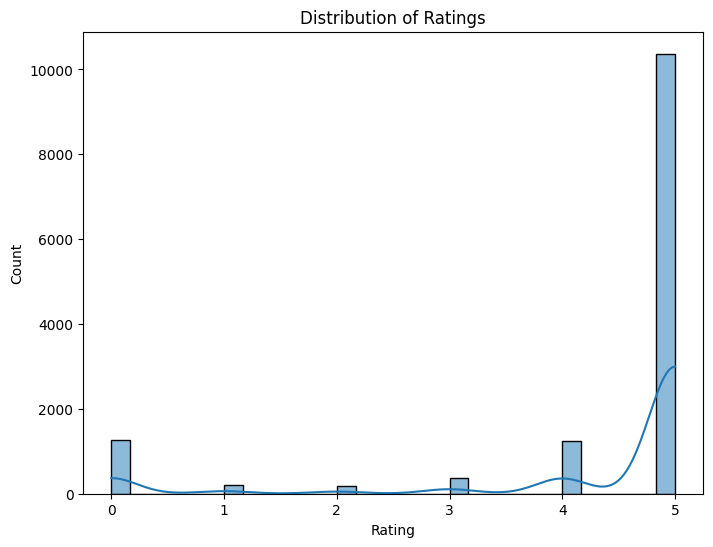

In [47]:
# Visualize the distribution of the target variable 'Rating' using a histogram
warnings.filterwarnings("ignore")
plt.figure(figsize=(8, 6))
sns.histplot(train['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

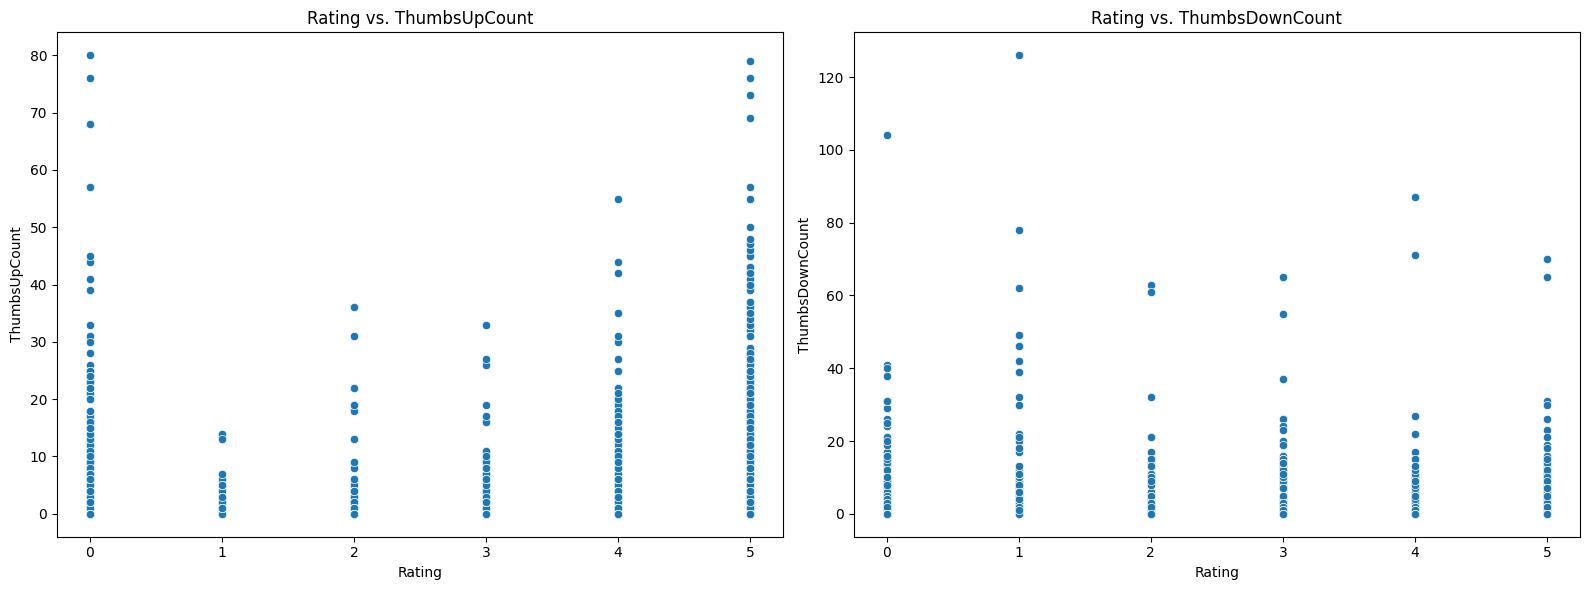

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Visualize the relationship between 'Rating' and 'ThumbsUpCount' using a scatter plot
sns.scatterplot(x='Rating', y='ThumbsUpCount', data=train, ax=axes[0])
axes[0].set_title('Rating vs. ThumbsUpCount')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('ThumbsUpCount')

# Visualize the relationship between 'Rating' and 'ThumbsDownCount' using a scatter plot
sns.scatterplot(x='Rating', y='ThumbsDownCount', data=train, ax=axes[1])
axes[1].set_title('Rating vs. ThumbsDownCount')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('ThumbsDownCount')


plt.tight_layout()
plt.show()

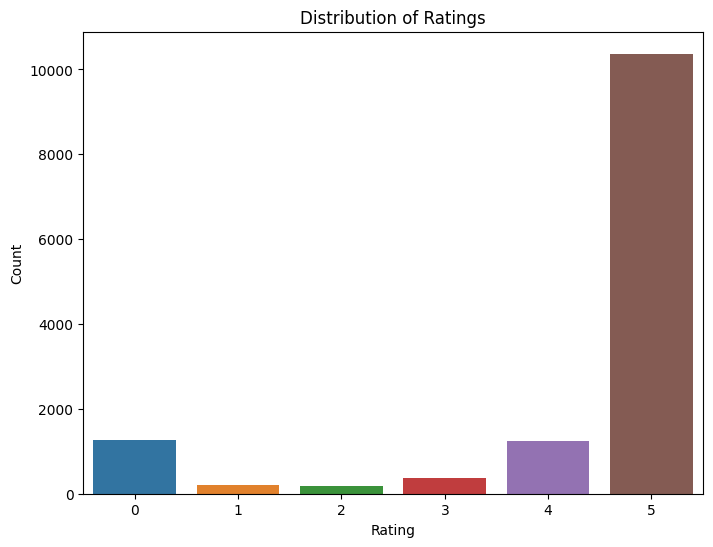

In [16]:
# Count the occurrences of each rating value
rating_counts = train['Rating'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

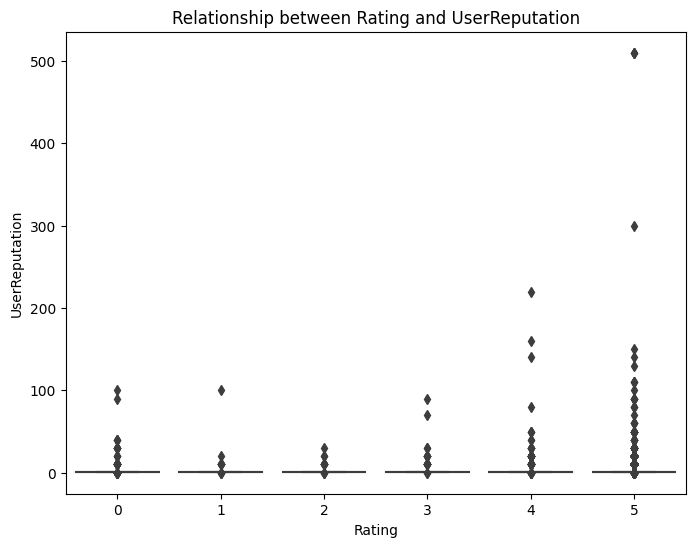

In [17]:
# Visualize the relationship between 'Rating' and 'UserReputation' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', y='UserReputation', data=train)
plt.title('Relationship between Rating and UserReputation')
plt.xlabel('Rating')
plt.ylabel('UserReputation')
plt.show()

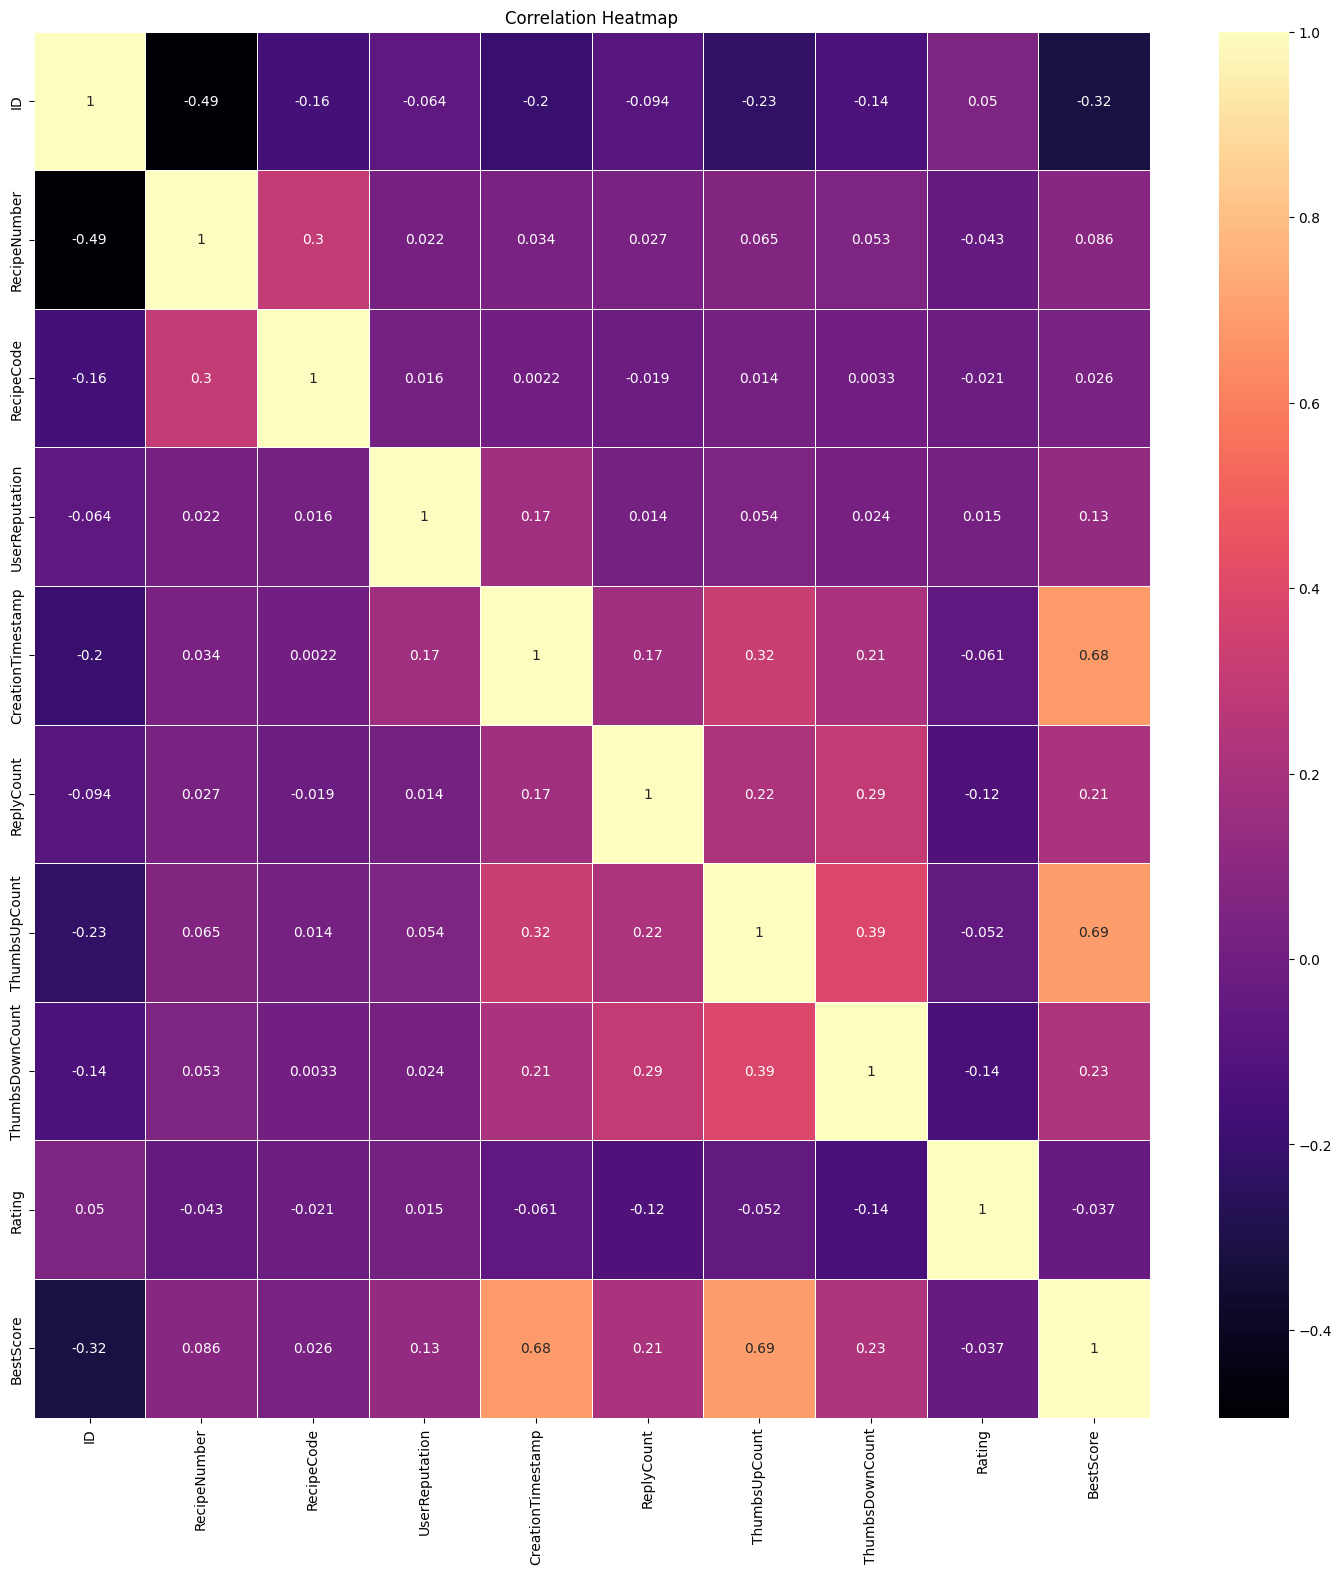

In [18]:
train_plot = train.select_dtypes(include=['int64', 'float64'])

correlation_matrix = train_plot.corr()
plt.figure(figsize=(18, 18))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Get the data types of columns
# column_types = train.dtypes

# # Filter for numerical columns
# numerical_columns = column_types[column_types != 'object']  # Exclude columns with 'object' dtype
# if len(numerical_columns) > 0:
#     print("Numerical columns in the dataset:")
#     print(numerical_columns)
# else:
#     print("There are no numerical columns in the dataset.")
    

In [20]:
# Remove unnecessary columns
columns_to_remove = ['ID', 'CommentID', 'UserID', 'UserName']
data_cleaned = train.drop(columns=columns_to_remove)
data_cleaned.head()

,RecipeNumber,RecipeCode,RecipeName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,71,12259,Banana Bars with Cream Cheese Frosting,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,88,8202,Simple Taco Soup,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,3,2832,Cheeseburger Soup,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,50,100276,Grilled Huli Huli Chicken,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,12,19731,Cauliflower Soup,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [21]:
data_cleaned.dropna(subset=['Recipe_Review'], inplace=True)
data_cleaned.isnull().sum()

RecipeNumber         0
RecipeCode           0
RecipeName           0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

In [22]:
# from sklearn.preprocessing import LabelEncoder

# data_cleaned['RecipeName']=LabelEncoder().fit_transform(data_cleaned['RecipeName'])

In [23]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# recipe_review = vectorizer.fit_transform(data_cleaned['Recipe_Review'])

In [24]:

# Define a function to apply LabelEncoder and convert to 2D
def label_encode(column):
    le = LabelEncoder()
    return le.fit_transform(column).reshape(-1, 1)

# Define the pipeline
pipeline = ColumnTransformer([
    ('tfidf', TfidfVectorizer(), 'Recipe_Review'),  # Apply TF-IDF to 'Recipe_Review' column
    ('label_encoder', FunctionTransformer(label_encode), 'RecipeName'),  # Apply LabelEncoder to 'RecipeName' column
#     ('scaler', StandardScaler(), ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore'])  # Apply StandardScaler to numerical columns
], remainder='passthrough')  # Keep all other columns unchanged

# Convert the transformed output into a DataFrame
def to_dataframe(transformed, column_transformer, original_df):
    # Get TF-IDF feature names
    tfidf_feature_names = column_transformer.named_transformers_['tfidf'].get_feature_names_out()

    # Manually create label encoded column name(s)
    label_encoded_names = ['RecipeName']

    # Combine them with passthrough columns
    passthrough_cols = list(original_df.drop(columns=['Recipe_Review', 'RecipeName']).columns)

    # Create a combined list of column names
    all_columns = list(tfidf_feature_names) + label_encoded_names + passthrough_cols

    # Convert sparse matrix to dense if necessary
    if isinstance(transformed, csr_matrix):
        transformed = transformed.toarray()

    # Convert into a DataFrame
    return pd.DataFrame(transformed, columns=all_columns)

# Applying the transformation
data_cleaned_transformed = to_dataframe(pipeline.fit_transform(data_cleaned), pipeline, data_cleaned)


In [25]:
data_cleaned_transformed

,00,000,03,04,05,07,08,10,100,1000mgs,...,RecipeName,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,71.0,12259.0,20.0,1.622717e+09,0.0,0.0,0.0,5.0,100.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83.0,88.0,8202.0,1.0,1.622718e+09,0.0,0.0,1.0,5.0,100.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,3.0,2832.0,1.0,1.622717e+09,0.0,0.0,0.0,3.0,100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,50.0,100276.0,1.0,1.622649e+09,0.0,0.0,0.0,5.0,100.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,12.0,19731.0,1.0,1.622718e+09,0.0,0.0,0.0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,98.0,11767.0,1.0,1.622717e+09,0.0,0.0,0.0,5.0,100.0
13630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,6.0,21444.0,1.0,1.622717e+09,0.0,0.0,0.0,5.0,100.0
13631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,37.0,20170.0,1.0,1.622718e+09,0.0,0.0,0.0,5.0,100.0
13632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,63.0,24886.0,1.0,1.622717e+09,0.0,0.0,0.0,5.0,100.0


In [26]:
 from sklearn.model_selection import train_test_split

# Assuming 'train' DataFrame is already loaded and preprocessed

# Split the data into features (X) and target variable (y)
X = data_cleaned_transformed.drop(columns=['Rating'])  # Features
y = data_cleaned_transformed['Rating']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (10907, 10489)
Shape of X_val: (2727, 10489)
Shape of y_train: (10907,)
Shape of y_val: (2727,)


In [27]:
# Create a DummyClassifier model that always predicts the most frequent class
dummy_model = DummyClassifier(strategy='most_frequent').fit(X, y)

# Fit the dummy model to the training data (redundant as the model was already fitted)
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [28]:
# Make predictions using the DummyClassifier
dummy_preds = dummy_model.predict(X_val)

# Calculate and display the accuracy of the DummyClassifier
dummy_accuracy = accuracy_score(y_val, dummy_preds)
print(f"DummyClassifier Accuracy: {dummy_accuracy}")

DummyClassifier Accuracy: 0.7634763476347635


In [29]:
# Create a RandomForestClassifier model
rand = RandomForestClassifier()

# Fit the RandomForestClassifier to the training data
rand.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
# Make predictions using the RandomForestClassifier
rand_preds = rand.predict(X_val)

# Calculate and display the accuracy of the RandomForestClassifier
rand_accuracy = accuracy_score(y_val, rand_preds)
print(f"RandomForestClassifier Accuracy: {rand_accuracy}")

RandomForestClassifier Accuracy: 0.7697103043637697


In [31]:
# Create a LogisticRegression model with specific parameters
X = data_cleaned["Recipe_Review"]
y = data_cleaned["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=0.5, min_df=1, sublinear_tf=True)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

log_r = LogisticRegression(C=1, max_iter=1000, solver='saga', penalty='l2')

# Fit the LogisticRegression model to the training data
log_r.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [32]:
# Make predictions using the LogisticRegression model
log_r_preds = log_r.predict(X_test)

# Calculate and display the accuracy of the LogisticRegression model
log_r_accuracy = accuracy_score(y_test, log_r_preds)
print(f"LogisticRegression Accuracy: {log_r_accuracy}")


LogisticRegression Accuracy: 0.7777777777777778


In [33]:
    # from imblearn.over_sampling import SMOTE

    # # Assuming y_train contains your target class labels for the training data
    # smote = SMOTE(sampling_strategy='auto', random_state=42)

    # # Apply SMOTE
    # X_resampled, y_resampled = smote.fit_resample(X_train_vect, y_train)

    # # Check the class distribution after resampling
    # print(pd.Series(y_resampled).value_counts())

In [34]:
# Assuming data_cleaned is your DataFrame with 'Recipe_Review' and 'Rating' columns

X = data_cleaned["Recipe_Review"]
y = data_cleaned["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=0.5, min_df=1, sublinear_tf=True)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Logistic Regression model
clf1 = LogisticRegression(C=1 , max_iter=1000 , solver='saga' , penalty='l2')

# Random Forest model
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)

# GaussianNB does not accept sparse input for fit method, thus we need to convert it into a dense array
# However, converting a large sparse matrix to a dense one might consume a lot of memory
# We can use a dimensionality reduction technique before applying GaussianNB

class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

# Pipeline for Naive Bayes
# Add a dimensionality reduction step if the dataset is very large to avoid memory issues
clf3_pipeline = make_pipeline(DenseTransformer(), GaussianNB())

# Ensemble model
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3_pipeline)], voting='hard')

eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

print(y_pred)

[5 5 5 ... 5 5 5]


In [35]:
#y_pred=model.predict(X_val)
print(X_train.shape)
print(X_test.shape)

(10907, 9421)
(2727, 9421)


In [36]:
from sklearn.metrics import classification_report

#classification report 
#report = classification_report(y_test, y_pred)
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.52      0.13      0.20       238
         1.0       0.50      0.12      0.20        41
         2.0       0.21      0.12      0.16        40
         3.0       0.43      0.08      0.13        78
         4.0       0.67      0.04      0.08       248
         5.0       0.79      0.99      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.52      0.25      0.27      2727
weighted avg       0.73      0.78      0.71      2727



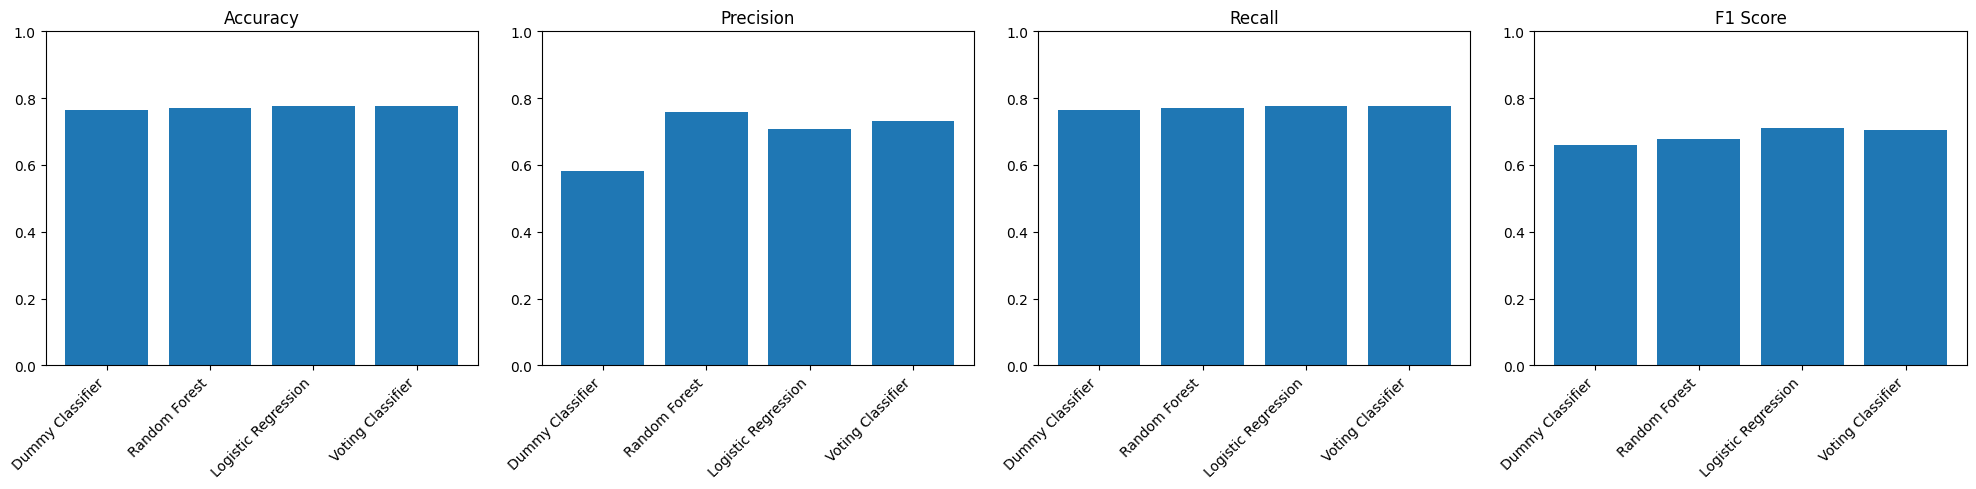

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Suppress all warnings
warnings.filterwarnings("ignore")

# Define a function to compute and return performance metrics
def compute_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Metrics for each model
metrics_dummy = compute_metrics(y_test, dummy_model.predict(X_test))
metrics_rf = compute_metrics(y_test, rand.predict(X_val))
metrics_lr = compute_metrics(y_test, log_r.predict(X_test))
metrics_vc = compute_metrics(y_test, eclf1.predict(X_test))

# Combine all metrics into a dictionary
metrics_dict = {
    'Dummy Classifier': metrics_dummy,
    'Random Forest': metrics_rf,
    'Logistic Regression': metrics_lr,
    'Voting Classifier': metrics_vc,
}

# Define metric names for plotting
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create subplots for each metric
fig, axes = plt.subplots(1, len(metric_names), figsize=(20, 5))

for idx, (metric, ax) in enumerate(zip(metric_names, axes)):
    values = [metrics_dict[model][idx] for model in metrics_dict]
    ax.bar(metrics_dict.keys(), values)
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(metrics_dict.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [38]:
# Remove unnecessary columns
columns_to_remove = ['ID', 'CommentID', 'UserID', 'UserName']
testdata_cleaned = test.drop(columns=columns_to_remove)
testdata_cleaned

,RecipeNumber,RecipeCode,RecipeName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,45,41384,Black Bean ‘n’ Pumpkin Chili,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,53,3143,Pumpkin Bars,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,53,3143,Pumpkin Bars,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,89,1324,Porcupine Meatballs,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,70,32264,Easy Chicken Enchiladas,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...
...,...,...,...,...,...,...,...,...,...,...
4541,32,17310,Seafood Lasagna,1,1622717899,0,0,0,100,This is an absolutely wonderful seafood recipe...
4542,74,26937,Pineapple Pudding Cake,1,1622717990,0,0,0,100,This us a definite &#34;OMG&#34;. Tastes sinf...
4543,73,41095,Contest-Winning New England Clam Chowder,1,1622716903,0,0,0,100,absolutely great....even husband and grandson ...
4544,12,19731,Cauliflower Soup,1,1622718289,0,0,1,100,I followed directions. It tastes very bland. V...


In [39]:
# testdata_cleaned['RecipeName']=LabelEncoder().fit_transform(testdata_cleaned['RecipeName'])

In [40]:
testrecipe_review = vectorizer.transform(testdata_cleaned['Recipe_Review'])

In [41]:
# testdata_cleaned = testdata_cleaned.drop(columns=['Recipe_Review'])

In [42]:
# testdata_cleaned_reset = testdata_cleaned.reset_index(drop=True)

# Concatenate along the columns
# combined_df_test = pd.concat([testdata_cleaned_reset, tfidf_df_test], axis=1)

In [43]:
# combined_df_test

In [44]:
X_test = testrecipe_review
y_pred = eclf1.predict(X_test)
submission = pd.DataFrame({'ID': range(1,4547),
                          'Rating': y_pred})

In [45]:
submission

,ID,Rating
0,1,5
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,1


In [46]:
submission.to_csv('submission.csv', index=False)